In [1]:
import math
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import re
import seaborn as sns
import pandas as pd
import random
from scipy import stats  #t-test
import semopy
import pandas as pd
from semopy import Model
import scipy.stats as stats 
from statsmodels.stats import multitest


C:\Users\ljr\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [59]:
tdatafas=np.loadtxt('fasfa.txt')
rdatafas1=np.loadtxt('fasfar1.txt')
rdatafas2=np.loadtxt('fasfar2.txt')
rdatafas3=np.loadtxt('fasfar3.txt')
rdatafas4=np.loadtxt('fasfar4.txt')
rdatafas5=np.loadtxt('fasfar5.txt')

In [60]:
print(len(tdatafas))

276


In [61]:
tdatafasc=np.loadtxt('faschi.txt')
rdatafasc1=np.loadtxt('faschir1.txt')
rdatafasc2=np.loadtxt('faschir2.txt')
rdatafasc3=np.loadtxt('faschir3.txt')
rdatafasc4=np.loadtxt('faschir4.txt')
rdatafasc5=np.loadtxt('faschir5.txt')

In [62]:
tdatachis=np.loadtxt('chisfa.txt')
rdatachis1=np.loadtxt('chisfar1.txt')
rdatachis2=np.loadtxt('chisfar2.txt')
rdatachis3=np.loadtxt('chisfar3.txt')
rdatachis4=np.loadtxt('chisfar4.txt')
rdatachis5=np.loadtxt('chisfar5.txt')

In [63]:
print(len(tdatachis))

313


In [64]:
tdatachisc=np.loadtxt('chischi.txt')
rdatachisc1=np.loadtxt('chischir1.txt')
rdatachisc2=np.loadtxt('chischir2.txt')
rdatachisc3=np.loadtxt('chischir3.txt')
rdatachisc4=np.loadtxt('chischir4.txt')
rdatachisc5=np.loadtxt('chischir5.txt')

In [65]:
tdatafasz1=np.loadtxt('fasfaz1.txt')
tdatafasz2=np.loadtxt('fasfaz2.txt')
rdatafasz1=np.loadtxt('fasfarz1.txt')

In [66]:
tdatafaszc1=np.loadtxt('faschiz1.txt')
tdatafaszc2=np.loadtxt('faschiz2.txt')
rdatafaszc1=np.loadtxt('faschirz1.txt')

In [67]:
tdatachisz1=np.loadtxt('chisfaz1.txt')
tdatachisz2=np.loadtxt('chisfaz2.txt')
rdatachisz1=np.loadtxt('chisfarz1.txt')

In [68]:
tdatachiszc1=np.loadtxt('chischiz1.txt')
tdatachiszc2=np.loadtxt('chischiz2.txt')
rdatachiszc1=np.loadtxt('chischirz1.txt')

In [121]:
def ttest (data,datacompare):
    sduration=stats.ttest_ind(data[:,0],datacompare[:,0])
    smfcc=stats.ttest_ind(data[:,1],datacompare[:,1])
    srf0=stats.ttest_ind(data[:,2],datacompare[:,2])
    smaxf0=stats.ttest_ind(data[:,3],datacompare[:,3])
    sminf0=stats.ttest_ind(data[:,4],datacompare[:,4])
    smf0=stats.ttest_ind(data[:,5],datacompare[:,5])
    smrms=stats.ttest_ind(data[:,6],datacompare[:,6])
    szc=stats.ttest_ind(data[:,7],datacompare[:,7])
    #print('p_value of duration=',sduration[1])
    #print('p_value of mfcc=',smfcc[1])
    #print('p_value of f0_range=',srf0[1])
    #print('p_value of f0_max=',smaxf0[1])
    #print('p_value of f0_min=',sminf0[1])
    #print('p_value of f0_mean=',smf0[1])
    #print('p_value of energy_rms=',smrms[1])
    #print('p_value of energy_zc=',szc[1])
    pvalue=np.r_[sduration[1],srf0[1],smaxf0[1],sminf0[1],smf0[1]]
    #pvalue=np.c_[sduration[1],smfcc[1],srf0[1],smaxf0[1],sminf0[1],smf0[1],smrms[1],szc[1]]
    ttt=multitest.multipletests(pvalue,alpha=0.1,method='fdr_bh')
    return pvalue,ttt

In [122]:
pvaluefaschis1,tttfaschis1=ttest(tdatafas,tdatachis)
print('fasfa vs chisfa=',pvaluefaschis1)
print('tfasfa vs chisfa=',tttfaschis1)

fasfa vs chisfa= [0.63734365 0.82366954 0.59457495 0.57166652 0.49306337]
tfasfa vs chisfa= (array([False, False, False, False, False]), array([0.79667956, 0.82366954, 0.79667956, 0.79667956, 0.79667956]), 0.0208516376390232, 0.02)


In [71]:
#pvaluefaschisz1=ttest(tdatafasz1[:,0:8],tdatachisz1[:,0:8])
#pvaluefaschisz2=ttest(tdatafasz1[:,8:16],tdatachisz1[:,8:16])
#pvaluefaschisz3=ttest(tdatafasz1[:,16:24],tdatachisz1[:,16:24])
#pvaluefaschisz4=ttest(tdatafasz1[:,24:32],tdatachisz1[:,24:32])
#pvaluefaschisz5=ttest(tdatafasz1[:,32:40],tdatachisz1[:,32:40])

#print((pvaluefaschisz1+pvaluefaschisz2+pvaluefaschisz3+pvaluefaschisz4+pvaluefaschisz5)/5)

[[0.84474986 0.82752407 0.69126176 0.57049005 0.71741322 0.51175372
  0.08359263 0.92656218]]


In [72]:
#pvaluefaschisz21=ttest(tdatafasz2[:,0:8],tdatachisz2[:,0:8])
#pvaluefaschisz22=ttest(tdatafasz2[:,8:16],tdatachisz2[:,8:16])
#pvaluefaschisz23=ttest(tdatafasz2[:,16:24],tdatachisz2[:,16:24])
#pvaluefaschisz24=ttest(tdatafasz2[:,24:32],tdatachisz2[:,24:32])
#pvaluefaschisz25=ttest(tdatafasz2[:,32:40],tdatachisz2[:,32:40])

#print((pvaluefaschisz21+pvaluefaschisz22+pvaluefaschisz23+pvaluefaschisz24+pvaluefaschisz25)/5)

[[0.82846755 0.84474966 0.66173518 0.56570819 0.55162105 0.47021518
  0.08782828 0.79902002]]


In [123]:
pvaluefaschisc1,tttfaschisc1=ttest(tdatafasc,tdatachisc)
print('faschi vs chischi=',pvaluefaschisc1)
print('tfaschi vs chischi=',tttfaschisc1)

faschi vs chischi= [0.00436717 0.02771031 0.00324792 0.06236755 0.01470749]
tfaschi vs chischi= (array([ True,  True,  True,  True,  True]), array([0.01091793, 0.03463788, 0.01091793, 0.06236755, 0.02451248]), 0.0208516376390232, 0.02)


In [74]:
#pvaluefaschiszc1=ttest(tdatafaszc1[:,0:8],tdatachiszc1[:,0:8])
#pvaluefaschiszc2=ttest(tdatafaszc1[:,8:16],tdatachiszc1[:,8:16])
#pvaluefaschiszc3=ttest(tdatafaszc1[:,16:24],tdatachiszc1[:,16:24])
#pvaluefaschiszc4=ttest(tdatafaszc1[:,24:32],tdatachiszc1[:,24:32])
#pvaluefaschiszc5=ttest(tdatafaszc1[:,32:40],tdatachiszc1[:,32:40])

#print((pvaluefaschiszc1+pvaluefaschiszc2+pvaluefaschiszc3+pvaluefaschiszc4+pvaluefaschiszc5)/5)

[[0.06282704 0.54806278 0.09804839 0.023385   0.57999875 0.25590812
  0.92776482 0.35896557]]


In [75]:
#pvaluefaschiszc21=ttest(tdatafaszc2[:,0:8],tdatachiszc2[:,0:8])
#pvaluefaschiszc22=ttest(tdatafaszc2[:,8:16],tdatachiszc2[:,8:16])
#pvaluefaschiszc23=ttest(tdatafaszc2[:,16:24],tdatachiszc2[:,16:24])
#pvaluefaschiszc24=ttest(tdatafaszc2[:,24:32],tdatachiszc2[:,24:32])
#pvaluefaschiszc25=ttest(tdatafaszc2[:,32:40],tdatachiszc2[:,32:40])

#print((pvaluefaschiszc21+pvaluefaschiszc22+pvaluefaschiszc23+pvaluefaschiszc24+pvaluefaschiszc25)/5)

[[0.12282476 0.66113823 0.14443225 0.04565057 0.67877088 0.30478566
  0.8603287  0.26848597]]


In [125]:
def ttestt (data,datacompare):
    sduration=stats.ttest_ind(data[:,0],datacompare[:,0])
    smfcc=stats.ttest_ind(data[:,1],datacompare[:,1])
    srf0=stats.ttest_ind(data[:,2],datacompare[:,2])
    smaxf0=stats.ttest_ind(data[:,3],datacompare[:,3])
    sminf0=stats.ttest_ind(data[:,4],datacompare[:,4])
    smf0=stats.ttest_ind(data[:,5],datacompare[:,5])
    smrms=stats.ttest_ind(data[:,6],datacompare[:,6])
    szc=stats.ttest_ind(data[:,7],datacompare[:,7])
    #print('p_value of duration=',sduration[1])
    #print('p_value of mfcc=',smfcc[1])
    #print('p_value of f0_range=',srf0[1])
    #print('p_value of f0_max=',smaxf0[1])
    #print('p_value of f0_min=',sminf0[1])
    #print('p_value of f0_mean=',smf0[1])
    #print('p_value of energy_rms=',smrms[1])
    #print('p_value of energy_zc=',szc[1])
    pvalue=np.r_[sduration[1],srf0[1],smaxf0[1],sminf0[1],smf0[1]]
    #pvalue=np.c_[sduration[1],smfcc[1],srf0[1],smaxf0[1],sminf0[1],smf0[1],smrms[1],szc[1]]
    #ttt=multitest.multipletests(pvalue,alpha=0.1,method='fdr_bh')
    return pvalue

In [129]:
def multit(data1,data2,data3,data4,data5):
    p1=np.r_[data1[0],data2[0],data3[0],data4[0],data5[0]]
    p2=np.r_[data1[1],data2[1],data3[1],data4[1],data5[1]]
    p3=np.r_[data1[2],data2[2],data3[2],data4[2],data5[2]]
    p4=np.r_[data1[3],data2[3],data3[3],data4[3],data5[3]]
    p5=np.r_[data1[4],data2[4],data3[4],data4[4],data5[4]]
    print('duration:',multitest.multipletests(p1,alpha=0.1,method='fdr_bh'))
    print('range:',multitest.multipletests(p2,alpha=0.1,method='fdr_bh'))
    print('max:',multitest.multipletests(p3,alpha=0.1,method='fdr_bh'))
    print('min:',multitest.multipletests(p4,alpha=0.1,method='fdr_bh'))
    print('mean:',multitest.multipletests(p5,alpha=0.1,method='fdr_bh'))

In [136]:
pvaluefas1=ttestt(tdatafas,rdatafas1)
pvaluefas2=ttestt(tdatafas,rdatafas2)
pvaluefas3=ttestt(tdatafas,rdatafas3)
pvaluefas4=ttestt(tdatafas,rdatafas4)
pvaluefas5=ttestt(tdatafas,rdatafas5)

multit(pvaluefas1,pvaluefas2,pvaluefas3,pvaluefas4,pvaluefas5)
mpvaluefas=(pvaluefas1+pvaluefas2+pvaluefas3+pvaluefas4+pvaluefas5)/5
print('mean p of fas=',mpvaluefas)

duration: (array([ True,  True,  True,  True,  True]), array([4.50491921e-07, 2.49325325e-07, 3.72355129e-05, 8.53896853e-06,
       8.53896853e-06]), 0.0208516376390232, 0.02)
range: (array([False, False, False, False, False]), array([0.99386788, 0.99386788, 0.99386788, 0.99386788, 0.99386788]), 0.0208516376390232, 0.02)
max: (array([False, False, False, False, False]), array([0.87625284, 0.87625284, 0.87625284, 0.87625284, 0.87625284]), 0.0208516376390232, 0.02)
min: (array([False, False, False, False, False]), array([0.92668266, 0.92668266, 0.92668266, 0.92668266, 0.92668266]), 0.0208516376390232, 0.02)
mean: (array([False, False, False, False, False]), array([0.57941096, 0.89986256, 0.89986256, 0.89986256, 0.57941096]), 0.0208516376390232, 0.02)
mean p of fas= [1.00749011e-05 7.06344324e-01 6.40456005e-01 6.71921816e-01
 5.68756334e-01]


In [137]:
pvaluefasc1=ttestt(tdatafasc,rdatafasc1)
pvaluefasc2=ttestt(tdatafasc,rdatafasc2)
pvaluefasc3=ttestt(tdatafasc,rdatafasc3)
pvaluefasc4=ttestt(tdatafasc,rdatafasc4)
pvaluefasc5=ttestt(tdatafasc,rdatafasc5)
multit(pvaluefasc1,pvaluefasc2,pvaluefasc3,pvaluefasc4,pvaluefasc5)
mpvaluefasc=(pvaluefasc1+pvaluefasc2+pvaluefasc3+pvaluefasc4+pvaluefasc5)/5
print('mean p of fasc=',mpvaluefasc)

duration: (array([ True,  True,  True,  True,  True]), array([1.76152155e-04, 3.75687870e-05, 8.37432663e-06, 8.37432663e-06,
       8.37432663e-06]), 0.0208516376390232, 0.02)
range: (array([ True,  True,  True,  True,  True]), array([7.64217867e-05, 1.15358457e-03, 1.39417061e-04, 5.49866800e-05,
       5.49866800e-05]), 0.0208516376390232, 0.02)
max: (array([ True,  True,  True,  True,  True]), array([0.00138816, 0.00714548, 0.00146471, 0.00146471, 0.00146471]), 0.0208516376390232, 0.02)
min: (array([False, False, False, False, False]), array([0.8337889, 0.8337889, 0.8337889, 0.8337889, 0.8337889]), 0.0208516376390232, 0.02)
mean: (array([ True, False,  True,  True, False]), array([0.05609118, 0.1677171 , 0.05609118, 0.07731059, 0.1677171 ]), 0.0208516376390232, 0.02)
mean p of fasc= [4.34663614e-05 2.70475169e-04 2.04480622e-03 6.66821281e-01
 8.33757077e-02]


In [138]:
pvaluechis1=ttestt(tdatachis,rdatachis1)
pvaluechis2=ttestt(tdatachis,rdatachis2)
pvaluechis3=ttestt(tdatachis,rdatachis3)
pvaluechis4=ttestt(tdatachis,rdatachis4)
pvaluechis5=ttestt(tdatachis,rdatachis5)
multit(pvaluechis1,pvaluechis2,pvaluechis3,pvaluechis4,pvaluechis5)
mpvaluechis=(pvaluechis1+pvaluechis2+pvaluechis3+pvaluechis4+pvaluechis5)/5
print('mean p of chis=',mpvaluechis)

duration: (array([ True,  True,  True,  True,  True]), array([2.04277836e-07, 3.78492355e-07, 1.61496900e-04, 3.64245447e-07,
       2.25236368e-05]), 0.0208516376390232, 0.02)
range: (array([False, False, False, False, False]), array([0.93343516, 0.99772084, 0.93343516, 0.99772084, 0.93343516]), 0.0208516376390232, 0.02)
max: (array([False, False, False, False, False]), array([0.98004598, 0.98004598, 0.98004598, 0.98004598, 0.98004598]), 0.0208516376390232, 0.02)
min: (array([False, False, False, False, False]), array([0.97355029, 0.97355029, 0.97355029, 0.97355029, 0.97355029]), 0.0208516376390232, 0.02)
mean: (array([False, False, False, False, False]), array([0.82708752, 0.82708752, 0.82708752, 0.82708752, 0.82708752]), 0.0208516376390232, 0.02)
mean p of chis= [3.59858917e-05 6.53421131e-01 7.32155924e-01 8.34571011e-01
 5.83626853e-01]


In [139]:
pvaluechisc1=ttestt(tdatachisc,rdatachisc1)
pvaluechisc2=ttestt(tdatachisc,rdatachisc2)
pvaluechisc3=ttestt(tdatachisc,rdatachisc3)
pvaluechisc4=ttestt(tdatachisc,rdatachisc4)
pvaluechisc5=ttestt(tdatachisc,rdatachisc5)
multit(pvaluechisc1,pvaluechisc2,pvaluechisc3,pvaluechisc4,pvaluechisc5)
mpvaluechisc=(pvaluechisc1+pvaluechisc2+pvaluechisc3+pvaluechisc4+pvaluechisc5)/5
print('mean p of chisc=',mpvaluechisc)

duration: (array([ True,  True,  True,  True,  True]), array([0.00586885, 0.08600134, 0.02249243, 0.00525374, 0.0166918 ]), 0.0208516376390232, 0.02)
range: (array([False, False, False, False, False]), array([0.2110107 , 0.66466213, 0.52664735, 0.2110107 , 0.2110107 ]), 0.0208516376390232, 0.02)
max: (array([False, False, False, False, False]), array([0.86969686, 0.86969686, 0.86969686, 0.86969686, 0.86969686]), 0.0208516376390232, 0.02)
min: (array([ True,  True,  True,  True,  True]), array([0.00941588, 0.0225433 , 0.0363925 , 0.00941588, 0.00941588]), 0.0208516376390232, 0.02)
mean: (array([False, False, False, False, False]), array([0.39157087, 0.39157087, 0.39157087, 0.39157087, 0.49172862]), 0.0208516376390232, 0.02)
mean p of chisc= [0.02348173 0.26999223 0.68639842 0.01324372 0.28188676]


In [80]:
#pvaluefasz1=ttest(tdatafasz1[:,0:8],rdatafasz1[:,0:8])
#pvaluefasz2=ttest(tdatafasz1[:,8:16],rdatafasz1[:,8:16])
#pvaluefasz3=ttest(tdatafasz1[:,16:24],rdatafasz1[:,16:24])
#pvaluefasz4=ttest(tdatafasz1[:,24:32],rdatafasz1[:,24:32])
#pvaluefasz5=ttest(tdatafasz1[:,32:40],rdatafasz1[:,32:40])

#mpvaluefasz=(pvaluefasz1+pvaluefasz2+pvaluefasz3+pvaluefasz4+pvaluefasz5)/5
#print('mean p of fasz=',mpvaluefasz)

mean p of fasz= [[8.16260410e-06 5.47994592e-01 6.50326412e-01 6.71541240e-01
  6.36767227e-01 3.96058863e-01 7.72677517e-01 7.41839827e-04]]


In [81]:
#pvaluefaszc1=ttest(tdatafaszc1[:,0:8],rdatafaszc1[:,0:8])
#pvaluefaszc2=ttest(tdatafaszc1[:,8:16],rdatafaszc1[:,8:16])
#pvaluefaszc3=ttest(tdatafaszc1[:,16:24],rdatafaszc1[:,16:24])
#pvaluefaszc4=ttest(tdatafaszc1[:,24:32],rdatafaszc1[:,24:32])
#pvaluefaszc5=ttest(tdatafaszc1[:,32:40],rdatafaszc1[:,32:40])

#mpvaluefaszc=(pvaluefaszc1+pvaluefaszc2+pvaluefaszc3+pvaluefaszc4+pvaluefaszc5)/5
#print('mean p of faszc=',mpvaluefaszc)

mean p of faszc= [[4.97438386e-04 1.40284482e-01 2.89137503e-04 1.83446046e-03
  6.85853509e-01 2.67669860e-01 2.78274936e-01 3.85929554e-01]]


In [82]:
#pvaluechisz1=ttest(tdatachisz2[:,0:8],rdatachisz1[:,0:8])
#pvaluechisz2=ttest(tdatachisz2[:,8:16],rdatachisz1[:,8:16])
#pvaluechisz3=ttest(tdatachisz2[:,16:24],rdatachisz1[:,16:24])
#pvaluechisz4=ttest(tdatachisz2[:,24:32],rdatachisz1[:,24:32])
#pvaluechisz5=ttest(tdatachisz2[:,32:40],rdatachisz1[:,32:40])

#mpvaluechisz=(pvaluechisz1+pvaluechisz2+pvaluechisz3+pvaluechisz4+pvaluechisz5)/5
#print('mean p of chisz=',mpvaluechisz)

mean p of chisz= [[5.80356339e-06 5.84301234e-01 5.14346082e-01 7.28231069e-01
  8.39302102e-01 5.07989821e-01 4.72779616e-01 4.50949195e-04]]


In [83]:
#pvaluechiszc1=ttest(tdatachiszc2[:,0:8],rdatachiszc1[:,0:8])
#pvaluechiszc2=ttest(tdatachiszc2[:,8:16],rdatachiszc1[:,8:16])
#pvaluechiszc3=ttest(tdatachiszc2[:,16:24],rdatachiszc1[:,16:24])
#pvaluechiszc4=ttest(tdatachiszc2[:,24:32],rdatachiszc1[:,24:32])
#pvaluechiszc5=ttest(tdatachiszc2[:,32:40],rdatachiszc1[:,32:40])

#mpvaluechiszc=(pvaluechiszc1+pvaluechiszc2+pvaluechiszc3+pvaluechiszc4+pvaluechiszc5)/5
#print('mean p of chiszc=',mpvaluechiszc)

mean p of chiszc= [[0.0578935  0.3509551  0.29939649 0.70847559 0.05426093 0.24704616
  0.42933881 0.71905087]]


In [84]:
def plotshow(datafas,datachis,datacompare):
    
    #xxx=np.empty([len(datafas)+len(datachis)+len(datacompare),3],dtype = str) 
    #xxx[0:len(datafas),:]=['I','-','C']
    #xxx[len(datafas):len(datafas)+len(datacompare),:]=['I','-','C']
    #xxx[len(datafas)+len(datacompare):,:]=['I','-','C']
    my_pal = {"C-I": "steelblue", "Non": "darkgoldenrod", "I-C":"lightcyan"}
    
    xxx=[None]*(len(tdatafas)+len(tdatachis)+len(rdatafas1))
    for i in range(len(tdatafas)):
        xxx[i]="C-I"
    for i in range(len(tdatafas),len(tdatafas)+len(rdatafas1)):
        xxx[i]="Non"
    for i in range(len(tdatafas)+len(rdatafas1),len(tdatafas)+len(tdatachis)+len(rdatafas1)):
        xxx[i]="I-C"
    compare_durationrow=np.r_[datafas[:,0],datacompare[:,0],datachis[:,0]]
    compare_mfccrow=np.r_[datafas[:,1],datacompare[:,1],datachis[:,1]]
    compare_rf0row=np.r_[datafas[:,2],datacompare[:,2],datachis[:,2]]
    compare_maxf0row=np.r_[datafas[:,3],datacompare[:,3],datachis[:,3]]
    compare_minf0row=np.r_[datafas[:,4],datacompare[:,4],datachis[:,4]]
    compare_mf0row=np.r_[datafas[:,5],datacompare[:,5],datachis[:,5]]
    compare_mrmsrow=np.r_[datafas[:,6],datacompare[:,6],datachis[:,6]]
    compare_zcrow=np.r_[datafas[:,7],datacompare[:,7],datachis[:,7]]
    
    ax = sns.boxplot(x=xxx, y=compare_durationrow, linewidth=1.5,whis=1.5, palette=my_pal)
    plt.xlabel('C-I turn/Non-turn/I-C turn', fontsize=12)
    plt.ylabel('duration',fontsize=12)
    #plt.title('I-C turn/Non-vocal exchange/C-I turn')
    plt.show()
    
    ax = sns.boxplot(x=xxx, y=compare_mfccrow, linewidth=1.5,whis=1.5, palette=my_pal)
    plt.xlabel('C-I turn/Non-turn/I-C turn', fontsize=12)
    plt.ylabel('compare_mfccrow',fontsize=12)
    #plt.title('I-C turn/Non-vocal exchange/C-I turn')
    plt.show()
    
    ax = sns.boxplot(x=xxx, y=compare_rf0row, linewidth=1.5,whis=1.5, palette=my_pal)
    plt.xlabel('C-I turn/Non-turn/I-C turn', fontsize=12)
    plt.ylabel('f0_range',fontsize=12)
    #plt.title('Vocal exchange/Non-vocal exchange')
    plt.show()
    
    ax = sns.boxplot(x=xxx, y=compare_maxf0row, linewidth=1.5,whis=1.5, palette=my_pal)
    plt.xlabel('C-I turn/Non-turn/I-C turn', fontsize=12)
    plt.ylabel('f0_max',fontsize=12)
    #plt.title('Vocal exchange/Non-vocal exchange')
    plt.show()

    ax = sns.boxplot(x=xxx, y=compare_minf0row, linewidth=1.5,whis=1.5, palette=my_pal)
    plt.xlabel('C-I turn/Non-turn/I-C turn', fontsize=12)
    plt.ylabel('f0_min',fontsize=12)
    #plt.title('Vocal exchange/Non-vocal exchange')
    plt.show()
    
    ax = sns.boxplot(x=xxx, y=compare_mf0row, linewidth=1.5,whis=1.5, palette=my_pal)
    plt.xlabel('C-I turn/Non-turn/I-C turn', fontsize=12)
    plt.ylabel('f0_mean',fontsize=12)
    #plt.title('Vocal exchange/Non-vocal exchange')
    plt.show()
    
    ax = sns.boxplot(x=xxx, y=compare_mrmsrow, linewidth=1.5,whis=1.5, palette=my_pal)
    plt.xlabel('C-I turn/Non-turn/I-C turn', fontsize=12)
    plt.ylabel('Energy',fontsize=12)
    #plt.title('Vocal exchange/Non-vocal exchange')
    plt.show()
    
    ax = sns.boxplot(x=xxx, y=compare_zcrow, linewidth=1.5,whis=1.5, palette=my_pal)
    plt.xlabel('C-I turn/Non-turn/I-C turn', fontsize=12)
    plt.ylabel('zerocrossing rate',fontsize=12)
    #plt.title('Vocal exchange/Non-vocal exchange')
    plt.show()

In [85]:
print(np.mean(tdatafasc[:,3]),np.mean(rdatafasc2[:,3]),np.mean(tdatachisc[:,3]))

456.24237508251963 493.5402477104417 493.50246350792116


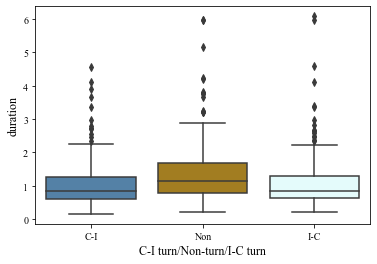

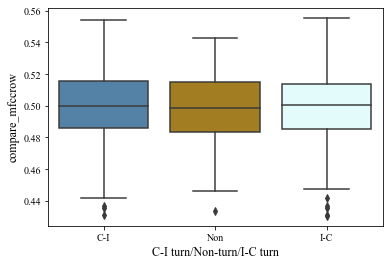

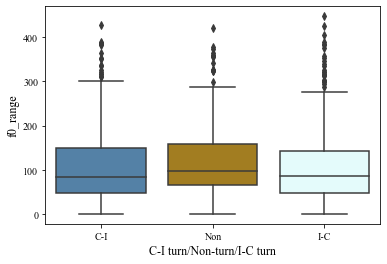

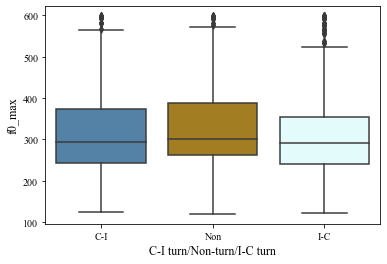

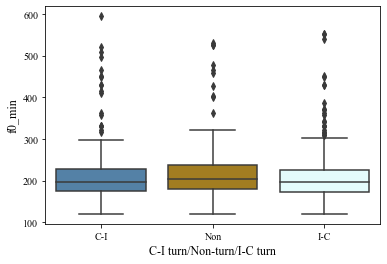

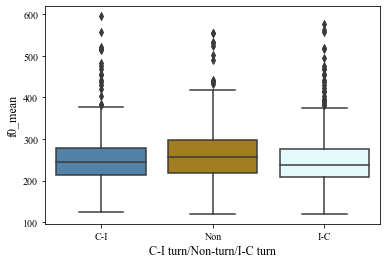

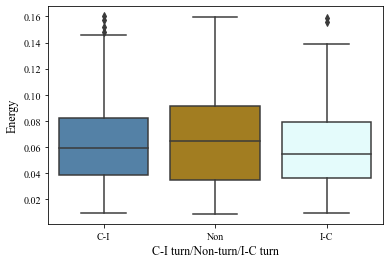

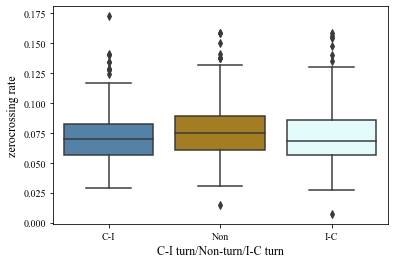

In [86]:
plotshow(tdatafas,tdatachis,rdatafas1)

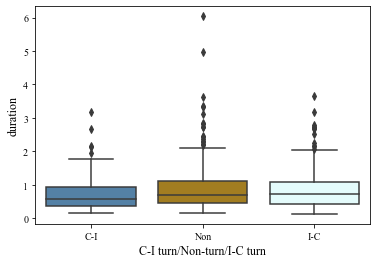

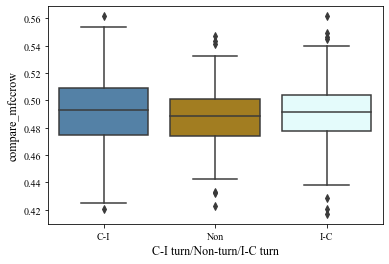

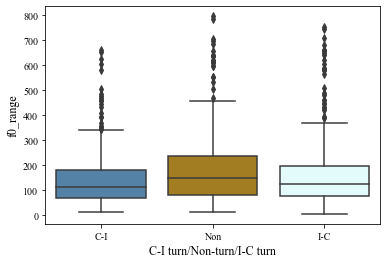

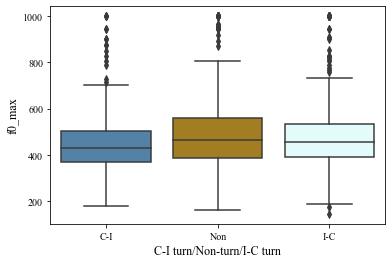

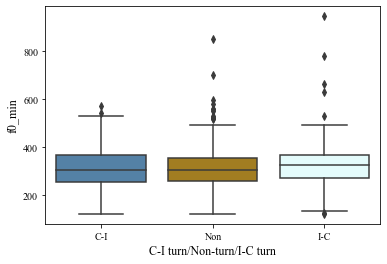

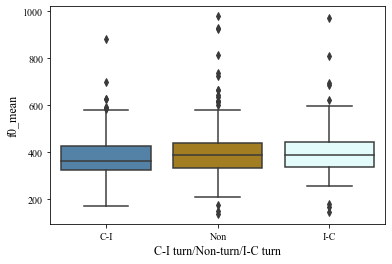

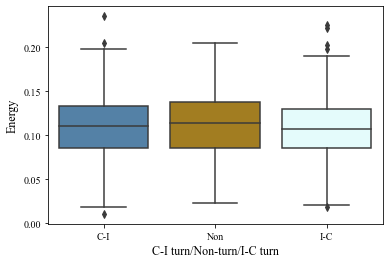

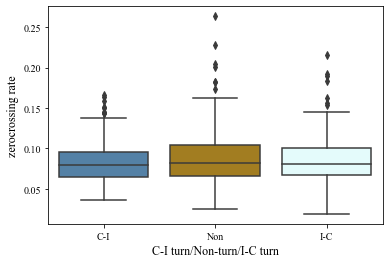

In [87]:
plotshow(tdatafasc,tdatachisc,rdatafasc1)

In [2]:
tdatas=np.loadtxt('fasfasortyoung.txt')
tdatasc=np.loadtxt('faschisortyoung.txt')
tdatachiss=np.loadtxt('chisfasortyoung.txt')
tdatachiscs=np.loadtxt('chischisortyoung.txt')
tdatasz=np.loadtxt('fasfazsortyoung.txt')
tdataszc=np.loadtxt('faschizsortyoung.txt')
tdatachiszs=np.loadtxt('chisfazsortyoung.txt')
tdatachiszcs=np.loadtxt('chischizsortyoung.txt')

In [8]:
print(len(tdatas[:,0]))

110


In [9]:
print('cofft of duration=',stats.pearsonr(tdatas[:,0],tdatasc[:,0]))
print('cofft of mfcc=',stats.pearsonr(tdatas[:,1],tdatasc[:,1]))
print('cofft of f0_range=',stats.pearsonr(tdatas[:,2],tdatasc[:,2]))
print('cofft of f0_max=',stats.pearsonr(tdatas[:,3],tdatasc[:,3]))
print('cofft of f0_min=',stats.pearsonr(tdatas[:,4],tdatasc[:,4]))
print('cofft of f0_mean=',stats.pearsonr(tdatas[:,5],tdatasc[:,5]))
print('cofft of energy_rms=',stats.pearsonr(tdatas[:,6],tdatasc[:,6]))
print('cofft of energy_zc=',stats.pearsonr(tdatas[:,7],tdatasc[:,7]))

cofft of duration= (0.006466300158855824, 0.9465458065219196)
cofft of mfcc= (-0.012088693133724742, 0.9002516164850477)
cofft of f0_range= (0.17316552028335072, 0.07043214478331207)
cofft of f0_max= (0.2678967953938954, 0.004661469235492585)
cofft of f0_min= (0.08279646516300326, 0.38982513070488123)
cofft of f0_mean= (0.20831827746244172, 0.028968066163715847)
cofft of energy_rms= (0.31995416349439604, 0.0006558392384316041)
cofft of energy_zc= (0.2356865817846015, 0.013186685254577581)


In [10]:
corrrangefas=stats.pearsonr(tdatas[:,2],tdatasc[:,2])
corrmaxfas=stats.pearsonr(tdatas[:,3],tdatasc[:,3])
corrminfas=stats.pearsonr(tdatas[:,4],tdatasc[:,4])
corrmeanfas=stats.pearsonr(tdatas[:,5],tdatasc[:,5])

p_vfas=np.r_[corrrangefas[1],corrmaxfas[1],corrminfas[1],corrmeanfas[1]]

In [11]:
print(p_vfas)

[0.07043214 0.00466147 0.38982513 0.02896807]


In [12]:
from statsmodels.stats import multitest
multitest.multipletests(p_vfas,alpha=0.1,method='fdr_bh')

(array([ True,  True, False,  True]),
 array([0.09390953, 0.01864588, 0.38982513, 0.05793613]),
 0.025996253574703254,
 0.025)

In [13]:
print('cofft of duration=',stats.pearsonr(tdatachiss[:,0],tdatachiscs[:,0]))
print('cofft of mfcc=',stats.pearsonr(tdatachiss[:,1],tdatachiscs[:,1]))
print('cofft of f0_range=',stats.pearsonr(tdatachiss[:,2],tdatachiscs[:,2]))
print('cofft of f0_max=',stats.pearsonr(tdatachiss[:,3],tdatachiscs[:,3]))
print('cofft of f0_min=',stats.pearsonr(tdatachiss[:,4],tdatachiscs[:,4]))
print('cofft of f0_mean=',stats.pearsonr(tdatachiss[:,5],tdatachiscs[:,5]))
print('cofft of energy_rms=',stats.pearsonr(tdatachiss[:,6],tdatachiscs[:,6]))
print('cofft of energy_zc=',stats.pearsonr(tdatachiss[:,7],tdatachiscs[:,7]))

cofft of duration= (-0.048779518725941745, 0.5800677550229552)
cofft of mfcc= (0.038397356398821594, 0.6632529117990499)
cofft of f0_range= (0.012926538776499437, 0.8834958000932306)
cofft of f0_max= (0.08189178719399352, 0.3524362240420864)
cofft of f0_min= (-0.043627199808489434, 0.6207511124196482)
cofft of f0_mean= (-0.0008013013250660651, 0.9927525833792714)
cofft of energy_rms= (0.2317182595401211, 0.007743237844191986)
cofft of energy_zc= (0.22485641699623263, 0.009820467983724199)


In [14]:
corrrangechis=stats.pearsonr(tdatachiss[:,2],tdatachiscs[:,2])
corrmaxchis=stats.pearsonr(tdatachiss[:,3],tdatachiscs[:,3])
corrminchis=stats.pearsonr(tdatachiss[:,4],tdatachiscs[:,4])
corrmeanchis=stats.pearsonr(tdatachiss[:,5],tdatachiscs[:,5])

p_vchis=np.r_[corrrangechis[1],corrmaxchis[1],corrminchis[1],corrmeanchis[1]]

In [15]:
multitest.multipletests(p_vchis,alpha=0.1,method='fdr_bh')

(array([False, False, False, False]),
 array([0.99275258, 0.99275258, 0.99275258, 0.99275258]),
 0.025996253574703254,
 0.025)

In [97]:
#print('cofft of rduration=',stats.pearsonr(rdatafas1[:,0],rdatafasc1[:,0]))
#print('cofft of rmfcc=',stats.pearsonr(rdatafas1[:,1],rdatafasc1[:,1]))
#print('cofft of rf0_range=',stats.pearsonr(rdatafas1[:,2],rdatafasc1[:,2]))
#print('cofft of rf0_max=',stats.pearsonr(rdatafas1[:,3],rdatafasc1[:,3]))
#print('cofft of rf0_min=',stats.pearsonr(rdatafas1[:,4],rdatafasc1[:,4]))
#print('cofft of rf0_mean=',stats.pearsonr(rdatafas1[:,5],rdatafasc1[:,5]))
#print('cofft of renergy_rms=',stats.pearsonr(rdatafas1[:,6],rdatafasc1[:,6]))
#print('cofft of renergy_zc=',stats.pearsonr(rdatafas1[:,7],rdatafasc1[:,7]))

In [16]:
print(np.mean(tdatachiss[:,3]),np.mean(tdatachiscs[:,3]))

302.12325753512886 473.2145923679925


In [17]:
motherf0range=tdatas[:,2]
infantf0range=tdatasc[:,2]
f0range=np.c_[tdatas[:,2],tdatasc[:,2]]
f0rangep=pd.DataFrame(f0range)
f0rangep.columns=['Mothers f0_range','Infants f0_range']

In [20]:
motherf0ranges=tdatachiss[:,2]
infantf0ranges=tdatachiscs[:,2]
f0ranges=np.c_[tdatachiss[:,2],tdatachiscs[:,2]]
f0rangeps=pd.DataFrame(f0ranges)
f0rangeps.columns=['Mothers f0_ranges','Infants f0_ranges']

In [18]:
motherf0max=tdatas[:,3]
infantf0max=tdatasc[:,3]
f0max=np.c_[tdatas[:,3],tdatasc[:,3]]
f0maxp=pd.DataFrame(f0max)
f0maxp.columns=['Mothers f0_max','Infants f0_max']

In [19]:
motherf0maxs=tdatachiss[:,3]
infantf0maxs=tdatachiscs[:,3]
f0maxs=np.c_[tdatachiss[:,3],tdatachiscs[:,3]]
f0maxps=pd.DataFrame(f0maxs)
f0maxps.columns=['Mothers f0_maxs','Infants f0_maxs']

In [21]:
motherf0min=tdatas[:,4]
infantf0min=tdatasc[:,4]
f0min=np.c_[tdatas[:,4],tdatasc[:,4]]
f0minp=pd.DataFrame(f0min)
f0minp.columns=['Mothers f0_min','Infants f0_min']

In [22]:
motherf0mins=tdatachiss[:,4]
infantf0mins=tdatachiscs[:,4]
f0mins=np.c_[tdatachiss[:,4],tdatachiscs[:,4]]
f0minps=pd.DataFrame(f0mins)
f0minps.columns=['Mothers f0_mins','Infants f0_mins']

In [23]:
motherf0mean=tdatas[:,5]
infantf0mean=tdatasc[:,5]
f0mean=np.c_[tdatas[:,5],tdatasc[:,5]]
f0meanp=pd.DataFrame(f0mean)
f0meanp.columns=['Mothers f0_mean','Infants f0_mean']

In [24]:
motherf0means=tdatachiss[:,5]
infantf0means=tdatachiscs[:,5]
f0means=np.c_[tdatachiss[:,5],tdatachiscs[:,5]]
f0meanps=pd.DataFrame(f0means)
f0meanps.columns=['Mothers f0_means','Infants f0_means']

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

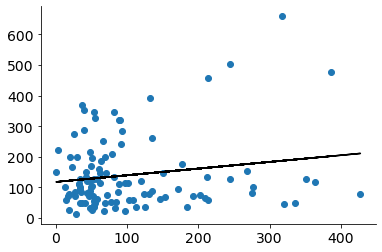

In [25]:
#ax = sns.scatterplot(x=tdatas[:,3], y=tdatasc[:,3])

fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')
#ax=sns.lmplot(x='Mothers f0_range', y='Infants f0_range',data=f0rangep, sharex=False, sharey=False)
plt.scatter(tdatas[:,2],tdatasc[:,2])
linear_model=np.polyfit(tdatas[:,2],tdatasc[:,2],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(tdatas[:,2],linear_model_fn(tdatas[:,2]),color="k")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax.set(xlim=(-10, 500))
#ax.set(ylim=(-10, 800))

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

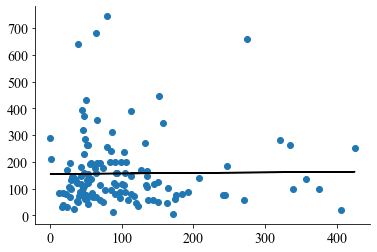

In [26]:
#ax = sns.scatterplot(x=tdatas[:,3], y=tdatasc[:,3])
#ax=sns.lmplot(x='Mothers f0_ranges', y='Infants f0_ranges',data=f0rangeps, sharex=False, sharey=False)
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')
plt.scatter(tdatachiss[:,2],tdatachiscs[:,2])
linear_model=np.polyfit(tdatachiss[:,2],tdatachiscs[:,2],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(tdatachiss[:,2],linear_model_fn(tdatachiss[:,2]),color="k")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax.set(xlim=(-10, 500))
#ax.set(ylim=(-10, 800))

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

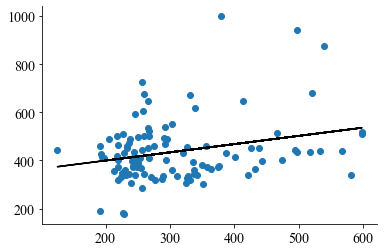

In [27]:
#ax = sns.scatterplot(x=tdatas[:,3], y=tdatasc[:,3])
#ax=sns.lmplot(x='Mothers f0_max', y='Infants f0_max',data=f0maxp, sharex=False, sharey=False)
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')
plt.scatter(tdatas[:,3],tdatasc[:,3])
linear_model=np.polyfit(tdatas[:,3],tdatasc[:,3],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(tdatas[:,3],linear_model_fn(tdatas[:,3]),color="k")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax.set(ylim=(100, 1100))
#ax.set(xlim=(100, 650))

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

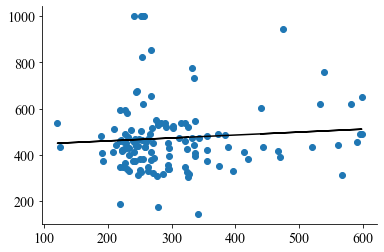

In [28]:
#ax = sns.scatterplot(x=tdatas[:,3], y=tdatasc[:,3])
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')
#ax=sns.lmplot(x='Mothers f0_maxs', y='Infants f0_maxs',data=f0maxps, sharex=False, sharey=False)
plt.scatter(tdatachiss[:,3],tdatachiscs[:,3])
linear_model=np.polyfit(tdatachiss[:,3],tdatachiscs[:,3],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(tdatachiss[:,3],linear_model_fn(tdatachiss[:,3]),color="k")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax.set(ylim=(100, 1100))
#ax.set(xlim=(100, 610))

[(100.0, 450.0)]

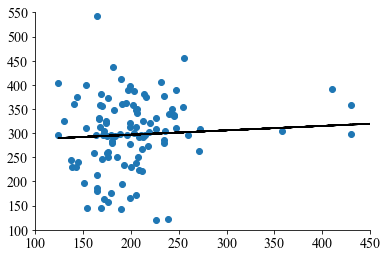

In [29]:
#ax = sns.scatterplot(x=tdatas[:,3], y=tdatasc[:,3])
#ax=sns.lmplot(x='Mothers f0_min', y='Infants f0_min',data=f0minp, sharex=False, sharey=False)
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')
plt.scatter(tdatas[:,4],tdatasc[:,4])
linear_model=np.polyfit(tdatas[:,4],tdatasc[:,4],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(tdatas[:,4],linear_model_fn(tdatas[:,4]),color="k")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set(ylim=(100, 550))
ax.set(xlim=(100, 450))

[(100.0, 600.0)]

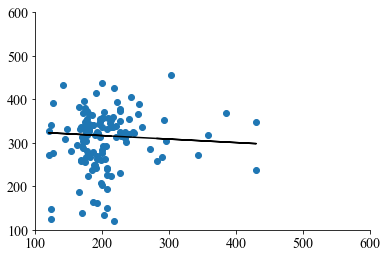

In [30]:
#ax = sns.scatterplot(x=tdatas[:,3], y=tdatasc[:,3])
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')
#ax=sns.lmplot(x='Mothers f0_mins', y='Infants f0_mins',data=f0minps, sharex=False, sharey=False)
plt.scatter(tdatachiss[:,4],tdatachiscs[:,4])
linear_model=np.polyfit(tdatachiss[:,4],tdatachiscs[:,4],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(tdatachiss[:,4],linear_model_fn(tdatachiss[:,4]),color="k")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set(ylim=(100, 600))
ax.set(xlim=(100, 600))

In [1]:
#ax = sns.scatterplot(x=tdatas[:,3], y=tdatasc[:,3])
plt.rc('font',family='Times New Roman')
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')
plt.scatter(tdatas[:,5],tdatasc[:,5])
linear_model=np.polyfit(tdatas[:,5],tdatasc[:,5],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(tdatas[:,5],linear_model_fn(tdatas[:,5]),color="k")
#ax=sns.lmplot(x='Mothers f0_mean', y='Infants f0_mean',data=f0meanp, sharex=False, sharey=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set(ylim=(100, 900))
ax.set(xlim=(100, 600))

NameError: name 'plt' is not defined

[(100.0, 600.0)]

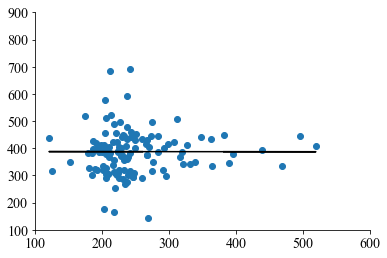

In [32]:
#ax = sns.scatterplot(x=tdatas[:,3], y=tdatasc[:,3])

fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('font',family='Times New Roman')
plt.scatter(tdatachiss[:,5],tdatachiscs[:,5])
linear_model=np.polyfit(tdatachiss[:,5],tdatachiscs[:,5],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(tdatachiss[:,5],linear_model_fn(tdatachiss[:,5]),color="k")
#ax=sns.lmplot(x='Mothers f0_means', y='Infants f0_means',data=f0meanps, sharex=False, sharey=False)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set(ylim=(100, 900))
ax.set(xlim=(100, 600))